In [6]:
!pip install gensim



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [8]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [9]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [10]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [11]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

My group agreed that yes, isolating a specific dimension in word embeddings often does reveal biases or assumptions inherent in the data. 


Part 2: Visualization and Embeddings in Space

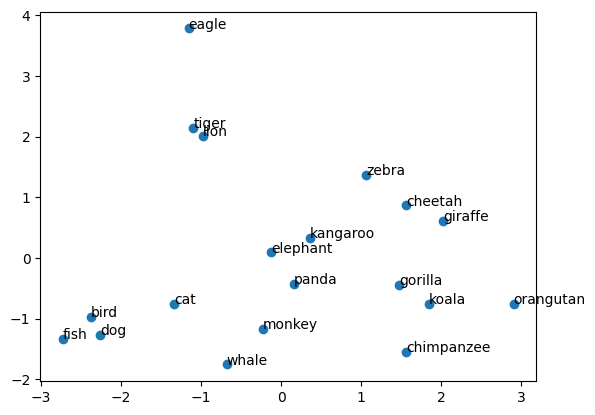

In [12]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

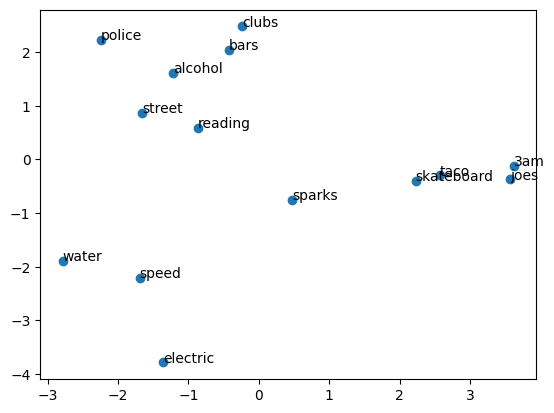

In [13]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["water","skateboard","reading", "speed", "police", "sparks", "clubs", "electric", "joes", "bars", "alcohol", "3am", "taco", "street" ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

I think it kind of makes sense but the words I gave it haves very wide variety. What I found interesting was the 3am and joes were very close. I think this would make sense cause I see a lot of people going to bars at aroud that time.



In [14]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


Part 3: Embedding reddit posts

In [15]:
import pandas as pd
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [16]:
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text
data['cleaned_text'] = data['text'].apply(clean)
from sklearn.feature_extraction.text import CountVectorizer
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
bag_of_words

<9450x16144 sparse matrix of type '<class 'numpy.int64'>'
	with 224890 stored elements in Compressed Sparse Row format>

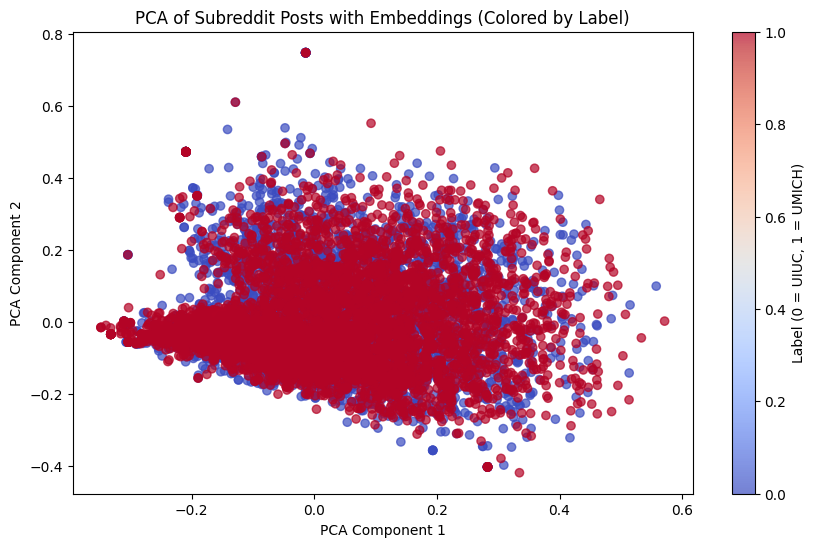

In [17]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Combine UIUC and UMICH datasets for embedding analysis
combined_df = pd.concat([uiuc, mich], ignore_index=True)

# Add label column (assuming 0 for UIUC and 1 for UMICH as identifiers)
combined_df['label'] = np.where(combined_df.index < len(uiuc), 0, 1)

# Convert text to TF-IDF embeddings
vectorizer = TfidfVectorizer(max_features=300)  # Limiting features for simplicity
text_embeddings = vectorizer.fit_transform(combined_df['text']).toarray()

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(text_embeddings)

# Plotting the PCA results with coloring by label
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=combined_df['label'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Label (0 = UIUC, 1 = UMICH)')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Subreddit Posts with Embeddings (Colored by Label)")
plt.show()




# Is there a clear separation between the two columns? 

The clusters appear to overlap significantly, showing that the posts from both subreddits may not have distinct language patterns or topics that are easily distinguishable with this embedding and PCA approach alone.

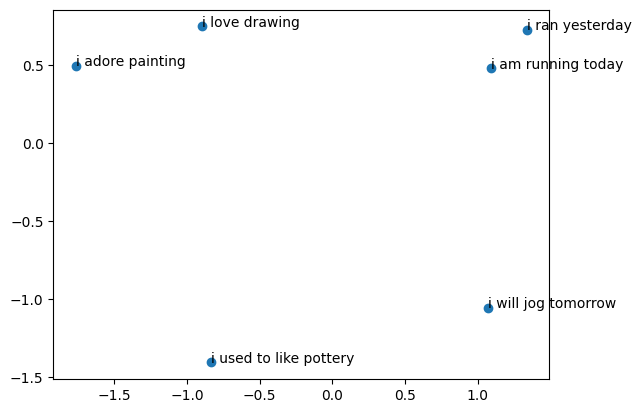

In [18]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()


#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

/Users/dylanwang/.virtualenvs/is310-env/lib/python3.11/site-packages/gensim/models/keyedvectors.py:551: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  warnings.warn(


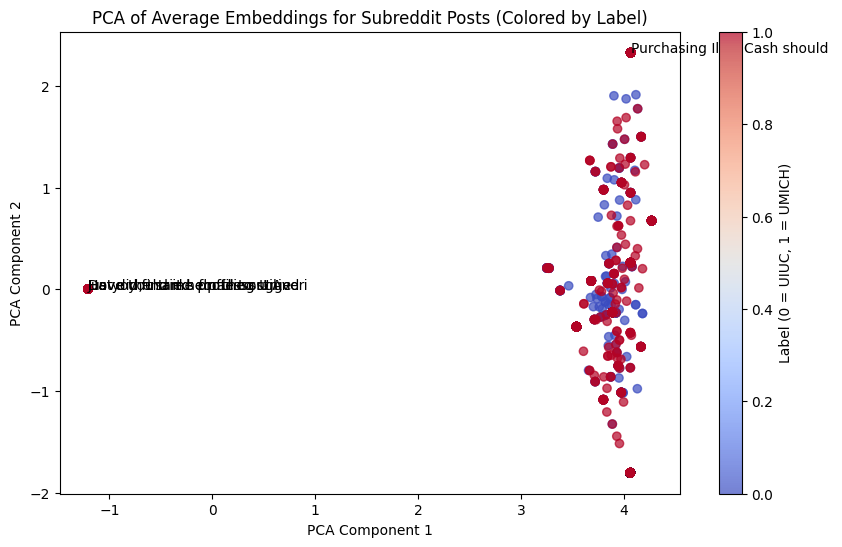

In [19]:
from gensim.models import KeyedVectors

# Define a mock word embedding model for demonstration purposes
# Normally, we'd load a pre-trained model like Word2Vec or GloVe
mock_model = KeyedVectors(vector_size=100)  # Create an empty KeyedVectors instance

# Adding some random embeddings to the mock model (for testing since no real model was specified)
words = ['i', 'am', 'running', 'today', 'will', 'jog', 'tomorrow', 'ran', 'yesterday', 'love', 'drawing', 
         'adore', 'painting', 'used', 'like', 'pottery']
for word in words:
    mock_model.add_vector(word, np.random.rand(100))

# Define the avg_embedding function
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

# Calculate the average embedding for each post in the combined subreddit dataset
combined_df['avg_embedding'] = combined_df['text'].apply(lambda sentence: avg_embedding(sentence, mock_model))

# Stack the average embeddings into a numpy array for PCA
avg_embeddings = np.vstack(combined_df['avg_embedding'].values)

# Apply PCA to reduce dimensionality
pca_avg_embeddings = PCA(n_components=2).fit_transform(avg_embeddings)

# Plotting the PCA results with coloring by label
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_avg_embeddings[:, 0], pca_avg_embeddings[:, 1], c=combined_df['label'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Label (0 = UIUC, 1 = UMICH)')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Average Embeddings for Subreddit Posts (Colored by Label)")

# Adding text annotations for the first few points for reference
for i in range(5):  # Limiting annotations to a few points for clarity
    plt.annotate(combined_df['text'].iloc[i][:30], (pca_avg_embeddings[i, 0], pca_avg_embeddings[i, 1]))

plt.show()


Part 4: HuggingFace and BERT

In [20]:
!pip install transformers
!pip install torch



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [21]:
pip install torch torchvision torchaudio


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [23]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this electric skateboards!")

[{'label': 'POS', 'score': 0.9929664134979248}]

In [39]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
# Apply the sentiment pipeline to classify the sentiment of each post


from transformers import pipeline

def classify_sentiment(text):
    try:
        return pipe(text)[0]['label']
    except Exception as e:
        print(f"Error processingw text: {text} -> {e}")
        return "UNKNOWN"

# Apply the function to classify sentiment and store results in a new 'sentiment' column
combined_df['sentiment'] = combined_df['text'].apply(classify_sentiment)


sample_posts = combined_df[['text', 'sentiment']].sample(10)
print(sample_posts)

subreddit_sentiment_counts = combined_df.groupby('label')['sentiment'].value_counts(normalize=True)
print(subreddit_sentiment_counts)


Error processingw text: Basically you just need to get to ORD (and fly to Newark from there). You’ve got three options for that

First, you can take a bus. Peoria Charter is a good option because they have service to ORD from three stops in CU every two hours or so (and more on busy travel days like school breaks). It’ll take around 3.5-4 hours to get to ORD and tickets around $40-$50 each way

You could also take the train, but it’s a bit more complicated, as Amtrak’s routes from Champaign to Chicago will end up you at Union Station in downtown. From there you’ll need to take the CTA blue line to the airport. It’s around a 2.5-3 hour train ride plus about 45 minutes on the CTA line. Amtrak tickets are much cheaper though, as they only cost around $15 if you book in advance (plus another $5 for the CTA ticket to the airport). You also have more limited timing options, as there are only 3 trains per day from Champaign to Chicago

Lastly, you could fly. There are two flights a day from C

In [36]:
#report the most common sentiment label

most_common_sentiment = combined_df['sentiment'].value_counts().idxmax()
print("Most common sentiment label:", most_common_sentiment)

Most common sentiment label: NEU


In [37]:
#look at ten sample posts and labels; do you agree with all of them? 

sample_posts = combined_df[['text', 'sentiment']].sample(10)
print(sample_posts)

                                                   text sentiment
4510  The water in Champaign Urbana is considered sa...       NEU
4762  They are extreme ideologues, they have no self...       NEG
8992  The girl was already checked on by the driver....       NEG
7436       selling my student ticket for fresno for 65!       NEU
6153  And trying to draw an equivalency between not ...       NEG
4076  Do you seriously think OP comes from a nation ...       NEU
3098  One that may make you lose your lunch from the...       NEG
7832   I doubt it, restrictions had been lifted by then       NEU
8776  > baking our babies in ovens\n\nwhat the fuck ...   UNKNOWN
8955  Does GEO not want non-member grad students to ...       NEG


In [38]:
#is the UIUC or Michigan subreddit more negative?

subreddit_sentiment_counts = combined_df.groupby('label')['sentiment'].value_counts(normalize=True)
print(subreddit_sentiment_counts)

label  sentiment
0      NEU          0.491224
       NEG          0.235659
       POS          0.224101
       UNKNOWN      0.049015
1      NEU          0.488154
       NEG          0.236073
       POS          0.191462
       UNKNOWN      0.084312
Name: proportion, dtype: float64
